# Logistic Regression

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!pip install psycopg2

In [4]:
engine = create_engine('XXXXXXX://XXXXXXX:XXXXXXX:XXXXXXX/XXXXXXX')
conn = engine.connect().execution_options(autocommit=True)

In [5]:
df_sig = pd.read_sql_query('select * from significance_table as st join submission_vectors as sv on st.submission_id = sv.submission_id where t_sample_t_test is not null;', con = conn)

In [6]:
df_inputs = df_sig.drop(columns=['submission_id','topic_champion','date'])
df_inputs

,upvotes,t_sample_t_test,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,3,False,-0.804775,0.315904,-0.045163,0.100483,0.480817,0.443167,-0.319338,0.516226,...,-0.095464,0.503082,0.525933,-0.406394,0.815783,0.151320,-0.144457,-0.481676,-0.180171,-0.400925
1,1040,False,-0.185703,0.023682,0.207782,0.530416,-0.544296,0.114059,-0.380009,0.627888,...,0.041726,0.392014,0.440717,0.400752,0.027663,0.116840,-0.704573,0.659166,0.310418,-0.337699
2,0,False,-0.516388,0.254332,0.183559,0.475579,0.455851,0.557130,-0.195927,0.583042,...,-0.130465,0.116177,0.354175,0.015838,-0.305019,-0.006427,-0.540465,-0.014772,0.244741,-0.074475
3,0,False,-0.192984,-0.142646,0.125904,0.382128,0.254417,0.257000,-0.637827,0.068707,...,0.124186,0.797552,0.310523,-0.135499,0.940158,0.501260,-0.530605,-0.101638,0.484378,-1.014775
4,0,False,-0.192984,-0.142646,0.125904,0.382128,0.254417,0.257000,-0.637827,0.068707,...,0.124186,0.797552,0.310523,-0.135499,0.940158,0.501260,-0.530605,-0.101638,0.484378,-1.014775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32734,174,False,-0.286790,-0.243372,0.259694,0.596197,-0.380780,-0.032148,0.061175,0.234752,...,-0.400553,0.664949,0.484354,0.101292,0.173315,0.235715,-0.620059,-0.012455,0.445785,-0.026895
32735,174,False,-0.286790,-0.243372,0.259694,0.596197,-0.380780,-0.032148,0.061175,0.234752,...,-0.400553,0.664949,0.484354,0.101292,0.173315,0.235715,-0.620059,-0.012455,0.445785,-0.026895
32736,20,False,-0.221735,-0.005563,0.136709,0.446870,-0.313393,0.185552,-0.421806,0.473120,...,0.197290,0.318249,0.350785,0.158812,0.144754,0.085425,-0.757788,0.405676,0.390924,-0.353025
32737,1575,False,-0.356414,0.122949,0.040761,0.409273,-0.053394,0.316902,0.157393,0.449702,...,0.306242,-0.034132,0.334505,0.188771,0.046193,-0.066672,-0.695834,0.058594,0.004527,-0.310824


In [7]:
cols = df_inputs.columns.tolist()

In [13]:
len(cols)

102

In [8]:
cols = cols[0:1] + cols[2:102] + cols[1:2]

In [15]:
len(cols)

102

In [16]:
cols

['upvotes',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 't_sample_t_test']

In [9]:
df_inputs = df_inputs[cols]

In [10]:
df_inputs

,upvotes,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,t_sample_t_test
0,3,-0.804775,0.315904,-0.045163,0.100483,0.480817,0.443167,-0.319338,0.516226,0.806492,...,0.503082,0.525933,-0.406394,0.815783,0.151320,-0.144457,-0.481676,-0.180171,-0.400925,False
1,1040,-0.185703,0.023682,0.207782,0.530416,-0.544296,0.114059,-0.380009,0.627888,-0.179360,...,0.392014,0.440717,0.400752,0.027663,0.116840,-0.704573,0.659166,0.310418,-0.337699,False
2,0,-0.516388,0.254332,0.183559,0.475579,0.455851,0.557130,-0.195927,0.583042,0.112773,...,0.116177,0.354175,0.015838,-0.305019,-0.006427,-0.540465,-0.014772,0.244741,-0.074475,False
3,0,-0.192984,-0.142646,0.125904,0.382128,0.254417,0.257000,-0.637827,0.068707,0.139172,...,0.797552,0.310523,-0.135499,0.940158,0.501260,-0.530605,-0.101638,0.484378,-1.014775,False
4,0,-0.192984,-0.142646,0.125904,0.382128,0.254417,0.257000,-0.637827,0.068707,0.139172,...,0.797552,0.310523,-0.135499,0.940158,0.501260,-0.530605,-0.101638,0.484378,-1.014775,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32734,174,-0.286790,-0.243372,0.259694,0.596197,-0.380780,-0.032148,0.061175,0.234752,0.055850,...,0.664949,0.484354,0.101292,0.173315,0.235715,-0.620059,-0.012455,0.445785,-0.026895,False
32735,174,-0.286790,-0.243372,0.259694,0.596197,-0.380780,-0.032148,0.061175,0.234752,0.055850,...,0.664949,0.484354,0.101292,0.173315,0.235715,-0.620059,-0.012455,0.445785,-0.026895,False
32736,20,-0.221735,-0.005563,0.136709,0.446870,-0.313393,0.185552,-0.421806,0.473120,-0.163098,...,0.318249,0.350785,0.158812,0.144754,0.085425,-0.757788,0.405676,0.390924,-0.353025,False
32737,1575,-0.356414,0.122949,0.040761,0.409273,-0.053394,0.316902,0.157393,0.449702,0.471984,...,-0.034132,0.334505,0.188771,0.046193,-0.066672,-0.695834,0.058594,0.004527,-0.310824,False


# Logistic Model Setup

In [14]:
X = df_inputs.drop(columns=['t_sample_t_test']) 
y = df_inputs.t_sample_t_test

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

In [16]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [17]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[22589     7]
 [ 1955     3]]
Training AUC: 61.4989 %
Training accuracy: 92.0094 %


In [18]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[7533    2]
 [ 649    1]]
Testing AUC: 55.4365 %
Testing accuracy: 92.0464 %


In [19]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

       False   0.920680  0.999735  0.958580      7535
        True   0.333333  0.001538  0.003063       650

    accuracy                       0.920464      8185
   macro avg   0.627006  0.500637  0.480821      8185
weighted avg   0.874036  0.920464  0.882699      8185



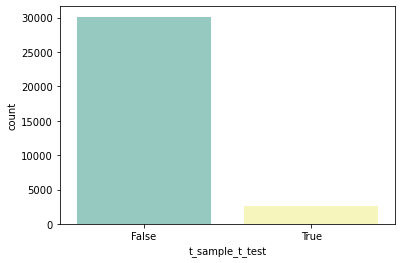

In [20]:
ax = sns.countplot(x="t_sample_t_test", data=df_inputs, palette="Set3")

In [21]:
sum(y_test_hat== False)

8182

# Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [12]:
X = df_inputs.drop(columns=['t_sample_t_test']) 
y = df_inputs.t_sample_t_test

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Starting Point (One Set of Hyperparameters)

In [24]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9071472205253512


In [28]:
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[7399  136]
 [ 626   24]]


In [29]:
y_pred_probs = clf.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_pred)*100
test_auc_roc = roc_auc_score(y_test, y_pred_probs)*100


print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[7399  136]
 [ 626   24]]
Testing AUC: 53.9190 %
Testing accuracy: 90.6903 %


The confusion matrix appears to be better, but the testing AUC and testing accuracy are acutally **worse**.

## Multiple Permutations

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': [{0:1, 1:12}]}

print(random_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 43, 76, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': [{0: 1, 1: 12}]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 1, 1: 12}],
                                        'max_depth': [10, 43, 76, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 76,
 'class_weight': {0: 1, 1: 12},
 'bootstrap': True}

## "Best" Model

In [13]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100,
                            min_samples_split=10,
                            min_samples_leaf=4,
                            max_features='auto',
                            max_depth=76,
                            bootstrap=True,
                            class_weight={0:1, 1:12}) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8984728161270616


In [14]:
y_pred_probs = clf.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_pred)*100
test_auc_roc = roc_auc_score(y_test, y_pred_probs)*100


print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[7316  219]
 [ 612   38]]
Testing AUC: 54.7914 %
Testing accuracy: 89.8473 %


C:\Users\aKost\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


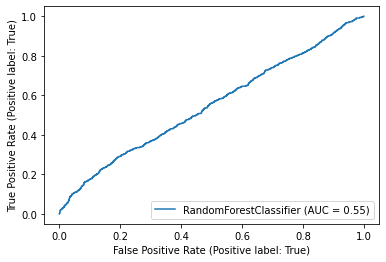

In [16]:
metrics.plot_roc_curve(clf, X_test, y_test)

# Neural Network Modeling

In [ ]:
## IMPORTS
import sys
import math
import numpy as np
import pandas as pd
import os
import torch
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import matplotlib.pyplot as plt

In [ ]:
# HYPERPARAMETERS
in_f = 101
out_f = 1
hidden_l = [0,1,2,3,4,5]
lr = 1e-3

## CLASS
class FFN(nn.Module):
    def __init__(self, in_features=101, n_hidden_layers=1, out_features=1):

        ## VALUE CHECKING
        if not isinstance(in_features, int):
            raise TypeError(f"Instance 'in_features' must be of type 'int', received type '{type(in_features)}'")
        if in_features <= 1:
            raise ValueError(f"Attribute 'in_features' must be >= 1, received value {in_features}")

        if not isinstance(n_hidden_layers, int):
            raise TypeError(f"Instance 'n_hidden_layers' must be of type 'int', received type '{type(n_hidden_layers)}'")
        if n_hidden_layers < 0 or n_hidden_layers > 5:
            raise ValueError(f"Attribute 'n_hidden_layers' must be >= 0 or <= 5, received value {n_hidden_layers}")

        if not isinstance(out_features, int):
            raise TypeError(f"Instance 'out_features' must be of type 'int', received type '{type(out_features)}'")
        if out_features < 1:
            raise ValueError(f"Attribute 'out_features' must be >= 1 , received value {out_features}")

        super(FFN, self).__init__()

        self.in_features = in_features
        self.n_hidden_layers = n_hidden_layers
        self.out_features = out_features

        self.0l = nn.Sequential(
            F.sigmoid()
        )
        self.1l = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.Dropout(0.1), 
            F.sigmoid()
        )    
        self.2l = nn.Sequential(
            nn.Linear(in_features, 200),
            nn.Dropout(0.1), 
            nn.Linear(200, out_features), 
            F.sigmoid()
        )
        self.3l = nn.Sequential(
            nn.Linear(in_features, 200),
            nn.Linear(200, 100),
            nn.Dropout(0.2),
            nn.Linear(100, out_features), 
            F.sigmoid()
        )
        self.4l = nn.Sequential(
            nn.Linear(in_features, 200), 
            nn.Linear(200, 200), nn.Linear(200, 100),
            nn.Dropout(0.3), 
            nn.Linear(100, out_features),
            F.sigmoid()
        )
        self.5l = nn.Sequential(
            nn.Linear(in_features, 200), 
            nn.Linear(200, 400), nn.Linear(400, 200), nn.Linear(200, 100),
            nn.Dropout(0.3),
            nn.Linear(100, out_features),
            F.sigmoid()
        )

def forward(self, x):
    if self.n_hidden_layers == 0:
        return self.0l(x)
    if self.n_hidden_layers == 1:
        return self.1l(x)
    elif self.n_hidden_layers == 2:
        return self.2l(x)
    elif self.n_hidden_layers == 3:
        return self.3l(x)
    elif self.n_hidden_layers == 4:
        return self.4l(x)
    elif self.n_hidden_layers == 5:
        return self.5l(x)

    return temp4

In [ ]:
## MODEL DEFINITION
model = FFN(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr) 

## TRAINING
e_l = [e+1 for e in range(num_epochs)]
l_l = []
a_l = []

for epoch in range(num_epochs):
    for i, (inputs, classes) in enumerate(training_data):
    inputs = inputs.reshape(-1,101).to(device)
    
    classes = classes.to(device)
    y_hat = model(inputs)
    
    loss = criterion(y_hat, classes)
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        l_l.append(loss.item()) 

with torch.no_grad():
    correct = 0
    total = 0
    for inputs, classes in testing_data:
        inputs = inputs.reshape(-1, 28*28).to(device)
        classes = classes.to(device)
        y_hat = model(inputs)

        _, predicted = torch.max(y_hat.data, 1)
        
        total += classes.size(0)
        correct += (predicted == classes).sum().item() 
    acc = correct / total
    print(f'Accuracy of the network: {(100.0 * acc):.2f} %')
    a_l.append(acc)